In [1]:
"""import the required libraries"""
import numpy as np 
import pandas as pd
from sklearn.utils import shuffle
import matplotlib.pyplot as plt
import math

In [2]:
"""read the data and preprocess it"""
input_data = open("/Users/kavinarasu/Desktop/GMM_dataset.txt", "r")
ipdata = input_data.read().splitlines()
new_data = [x.split("  ") for x in ipdata] 
new_data = np.asarray(new_data)
new_data = np.delete(new_data,0,1)
new_data = new_data.astype(float)
data=new_data

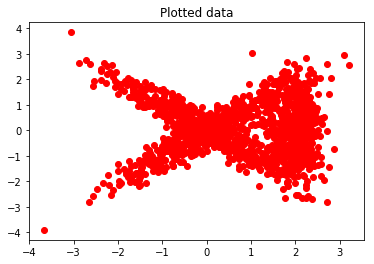

In [3]:
"""plotting the data"""
a = data[:,0]
b = data[:,1]
plt.plot(a,b,'ro')
plt.title('Plotted data')
plt.rcParams['figure.figsize']=[10,6]

iteration number: 0


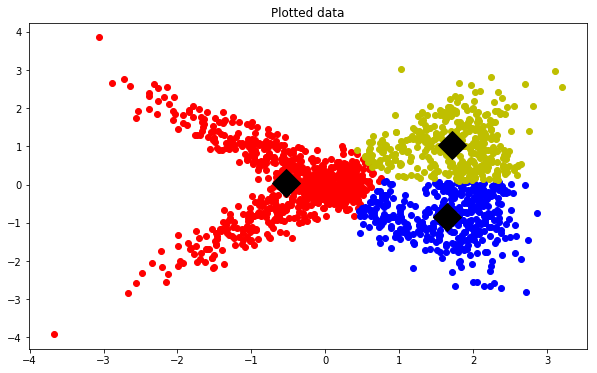

iteration number: 1


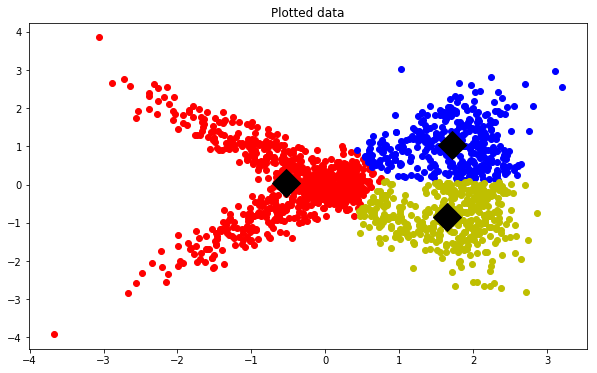

iteration number: 2


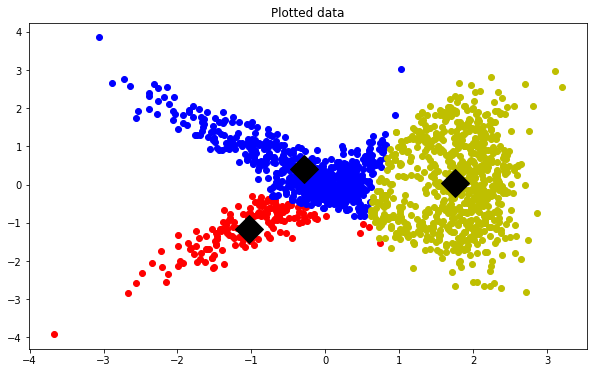

iteration number: 3


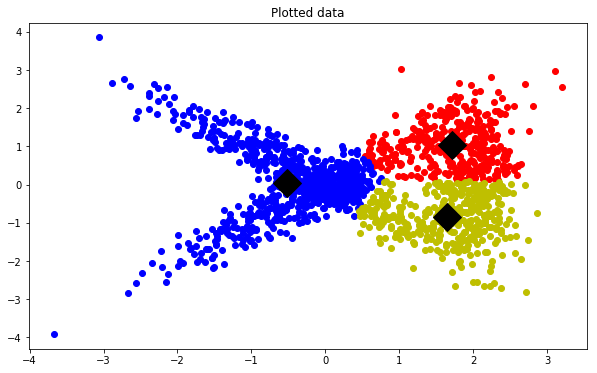

iteration number: 4


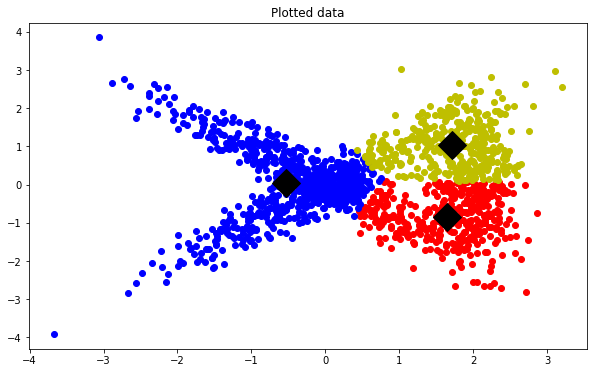

iteration number: 5


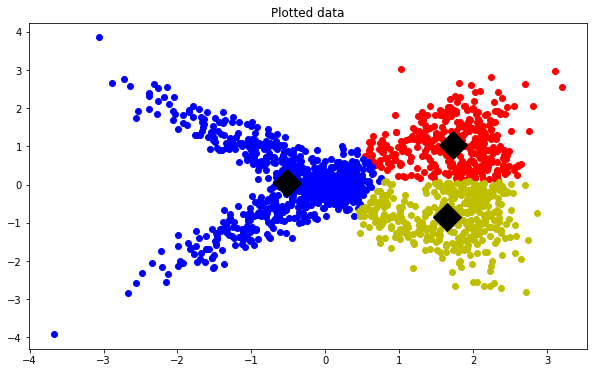

iteration number: 6


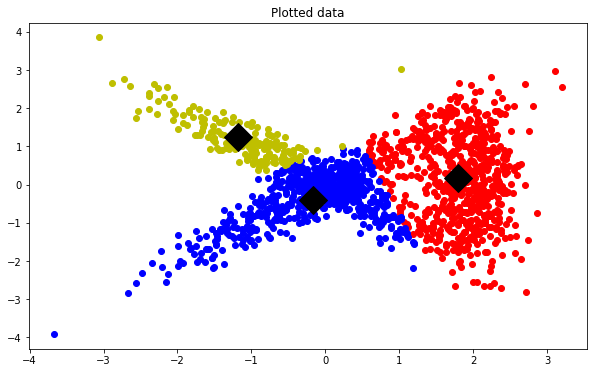

iteration number: 7


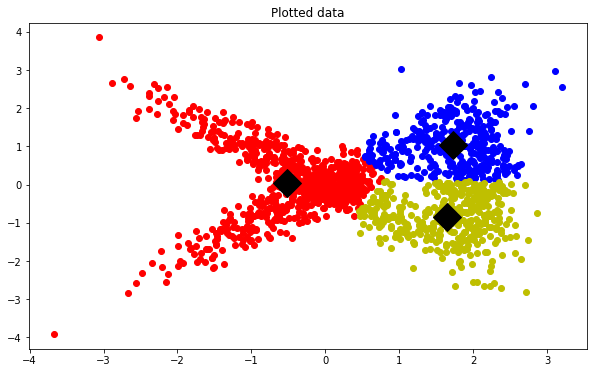

iteration number: 8


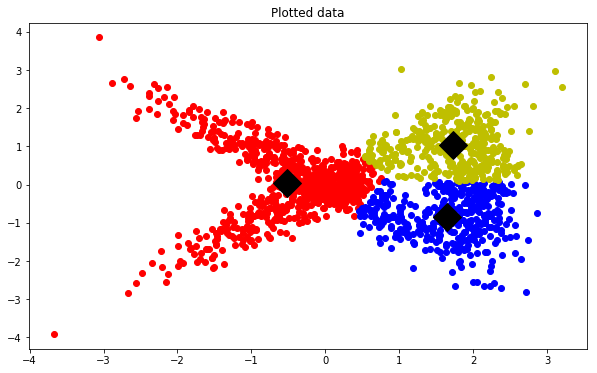

iteration number: 9


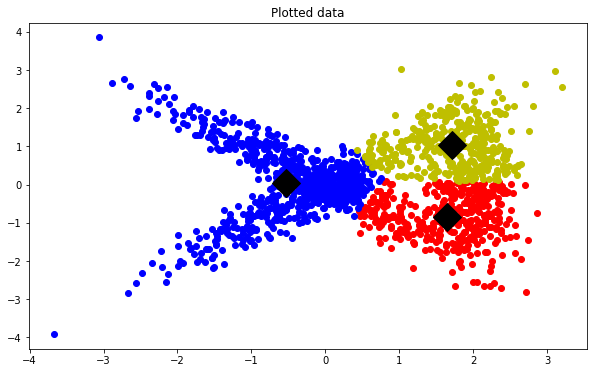

best cluster from all the iterations


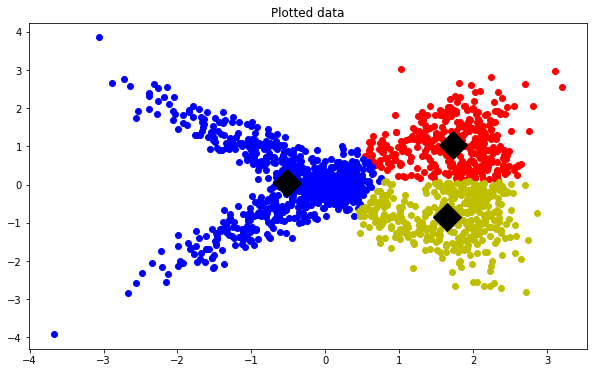

In [4]:
no_of_clusters = 3
def euc_dist(a,b):
    dist = math.sqrt((a[0] - b[0])**2 + (a[1] - b[1])**2)
    return dist
def split_data(assign_centroid,data):
    centroid1=0
    centroid2=0
    centroid3=0
    centroid1_data=[]
    centroid2_data=[]
    centroid3_data=[]
    centroid1_data_sum=np.zeros((1,2))
    centroid2_data_sum=np.zeros((1,2))
    centroid3_data_sum=np.zeros((1,2))
    for i in range(assign_centroid.shape[0]):
        if assign_centroid[i][0] == 1:
            centroid1 = centroid1 +1
            centroid1_data = np.append(centroid1_data,data[i,:])
        elif assign_centroid[i][1] ==1:
            centroid2 = centroid2 +1
            centroid2_data = np.append(centroid2_data,data[i,:])
        else:
            centroid3 = centroid3 +1
            centroid3_data = np.append(centroid3_data,data[i,:])

    centroid1_data=centroid1_data.reshape(centroid1,2)
    centroid2_data=centroid2_data.reshape(centroid2,2)
    centroid3_data=centroid3_data.reshape(centroid3,2)
    return centroid1_data,centroid2_data,centroid3_data
    

def find_mse(data,centroid):
    mse=0
    for i in range(data.shape[0]):
        euclidean_dist=[]
        for j in range(centroid.shape[0]):
            dist = euc_dist(data[i,:], centroid[j,:])
            euclidean_dist = np.append(euclidean_dist, dist)
        mse = mse + np.min(euclidean_dist)
    return mse
        
def plotgraph(centroid1_data,centroid2_data,centroid3_data,centroid):
    a = centroid1_data[:,0]
    b = centroid1_data[:,1]
    plt.plot(a,b,'ro')
    s=plt.plot(centroid[0,0], centroid[0,1], 'kD')
    plt.setp(s,'markersize',20)
    plt.title('Plotted data')
    plt.rcParams['figure.figsize']=[10,6]
    a = centroid2_data[:,0]
    b = centroid2_data[:,1]
    plt.plot(a,b,'bo')
    m = plt.plot(centroid[1,0], centroid[1,1], 'kD')
    plt.setp(m,'markersize',20)
    plt.title('Plotted data')
    plt.rcParams['figure.figsize']=[10,6]
    a = centroid3_data[:,0]
    b = centroid3_data[:,1]
    plt.plot(a,b,'yo')
    l=plt.plot(centroid[2,0], centroid[2,1], 'kD')
    plt.setp(l,'markersize',20)
    plt.title('Plotted data')
    plt.rcParams['figure.figsize']=[10,6]
    plt.show()

def k_means (data,no_of_clusters):
    mse_list=[]
    min_mse_centroid=[]
    min_mse_assign_centroid=[]
    mse_min=10000
    for i in range(10):
        cent_euc=1
        idx = np.random.randint(1500, size=no_of_clusters)
        centroid=data[idx,:]
        c_old=centroid
        iteration=1
        print("iteration number:",i)
        while(cent_euc>0):
            """ASSIGNMENT STEP"""     
            iteration=iteration+1
            assign_centroid=np.zeros((1500,3))
            for i in range(data.shape[0]):
                euclidean_dist=[]
                for j in range(centroid.shape[0]):
                    dist = euc_dist(data[i,:], centroid[j,:])
                    euclidean_dist = np.append(euclidean_dist, dist)
                assign_centroid[i][np.argmin(euclidean_dist)] =1        

            """UPDATE STEP"""
            centroid1_data,centroid2_data,centroid3_data=split_data(assign_centroid,data)
            c_new=np.zeros((3,2))
            c_new[0,:]=centroid1_data.mean(axis=0)
            c_new[1,:]=centroid2_data.mean(axis=0)
            c_new[2,:]=centroid3_data.mean(axis=0)
            if(np.array_equal(centroid,c_new)):
                cent_euc=0
                mse_list = np.append(mse_list,find_mse(data,c_new))
                temp_mse_min=np.min(mse_list)
                plotgraph(centroid1_data,centroid2_data,centroid3_data,centroid)
                if(temp_mse_min<mse_min):
                    mse_min=temp_mse_min
                    min_mse_centroid=c_new
                    min_mse_assign_centroid=assign_centroid
            centroid=c_new
    centroid1_data,centroid2_data,centroid3_data=split_data(min_mse_assign_centroid,data)
    print("best cluster from all the iterations")
    plotgraph(centroid1_data,centroid2_data,centroid3_data,min_mse_centroid)  

k_means(data,no_of_clusters)